<a href="https://colab.research.google.com/github/2303A52132/AIML_2303A52132/blob/main/STML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction India Agriculture Crop Production**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/SML/India Agriculture Crop Production.csv', encoding='latin-1')
data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [ ]:
data.isnull().sum()

,0
State,0
District,0
Crop,32
Year,0
Season,1
Area,33
Area Units,0
Production,4993
Production Units,0
Yield,33


### Apply One-Hot Encoding to categorical columns

In [ ]:
data = data.dropna()
data = pd.get_dummies(data, columns=['State', 'District', 'Crop', 'Season'])

In [ ]:
data.isnull().sum()

,0
Year,0
Area,0
Area Units,0
Production,0
Production Units,0
...,...
Season_Kharif,0
Season_Rabi,0
Season_Summer,0
Season_Whole Year,0


In [ ]:
data.columns

Index(['Year', 'Area', 'Area Units', 'Production', 'Production Units', 'Yield',
       'State_Andaman and Nicobar Islands', 'State_Andhra Pradesh',
       'State_Arunachal Pradesh', 'State_Assam',
       ...
       'Crop_Turmeric', 'Crop_Urad', 'Crop_Wheat', 'Crop_other oilseeds',
       'Season_Autumn', 'Season_Kharif', 'Season_Rabi', 'Season_Summer',
       'Season_Whole Year', 'Season_Winter'],
      dtype='object', length=832)

# Correlation Heatmap

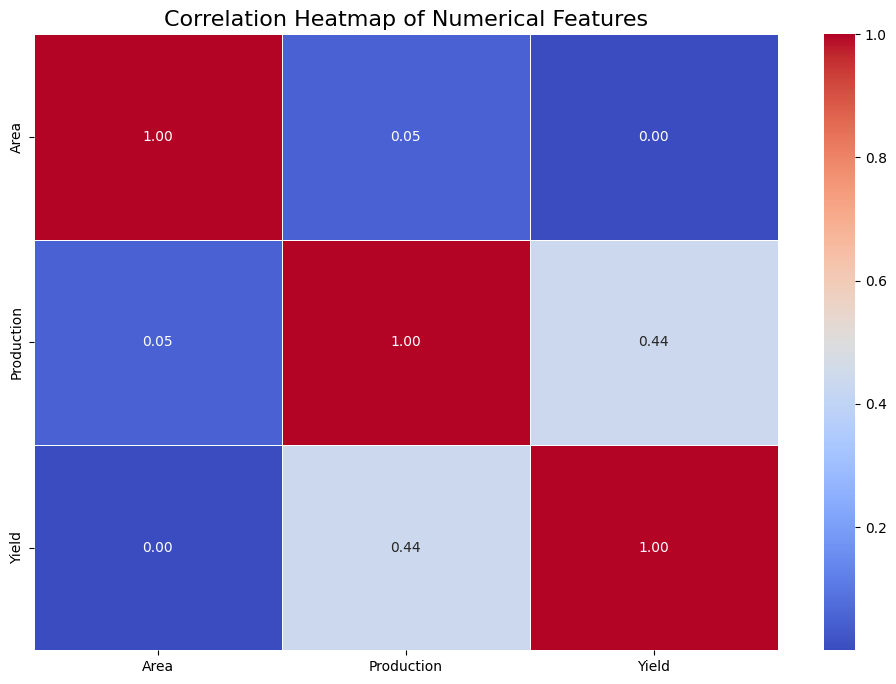

In [ ]:
plt.figure(figsize=(12, 8))
corr_matrix = data.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

## Density

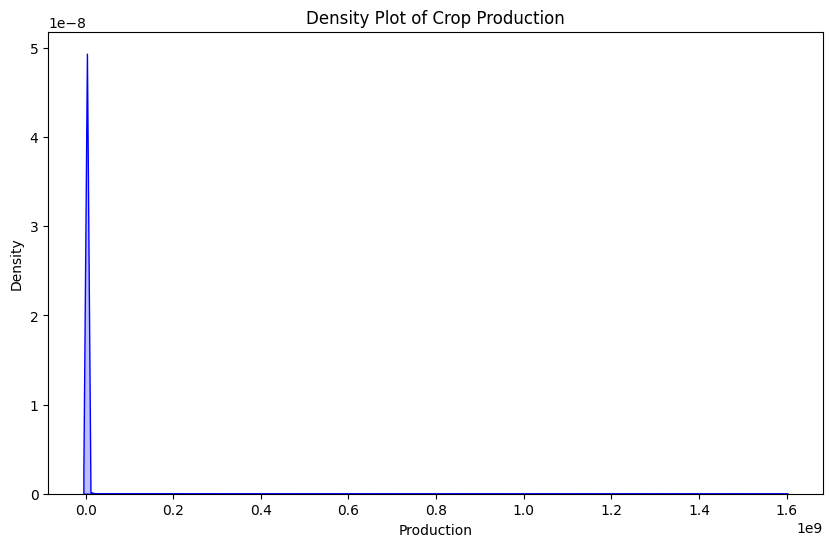

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Production'], shade=True, color='blue')
plt.title('Density Plot of Crop Production')
plt.xlabel('Production')
plt.ylabel('Density')
plt.show()

# **Data Visualization**

# Histogram

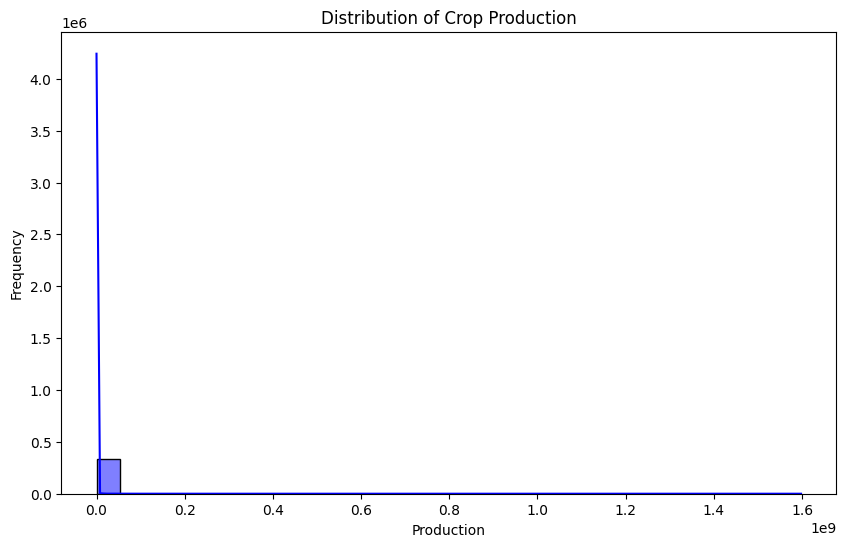

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Production'], kde=True, bins=30, color='blue')
plt.title('Distribution of Crop Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

# Scatter Plot

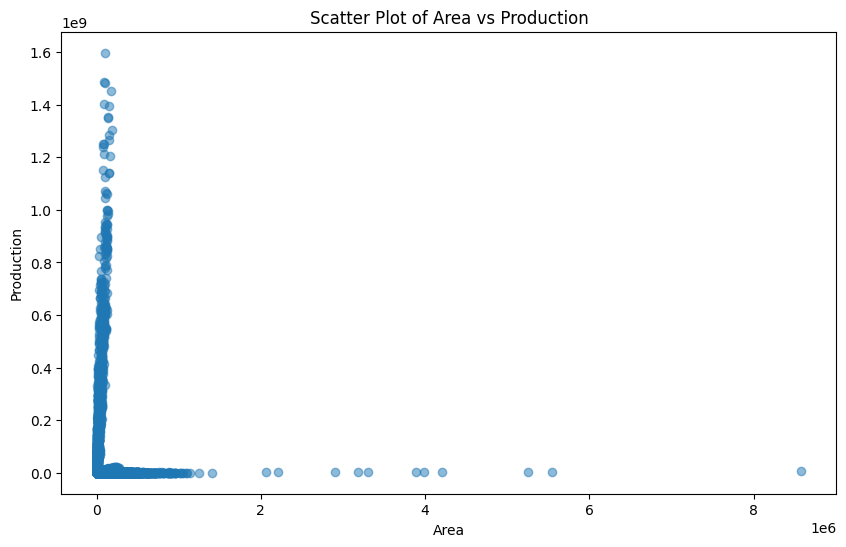

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Area'], data['Production'], alpha=0.5)
plt.title('Scatter Plot of Area vs Production')
plt.xlabel('Area')
plt.ylabel('Production')
plt.show()

# Lineplot

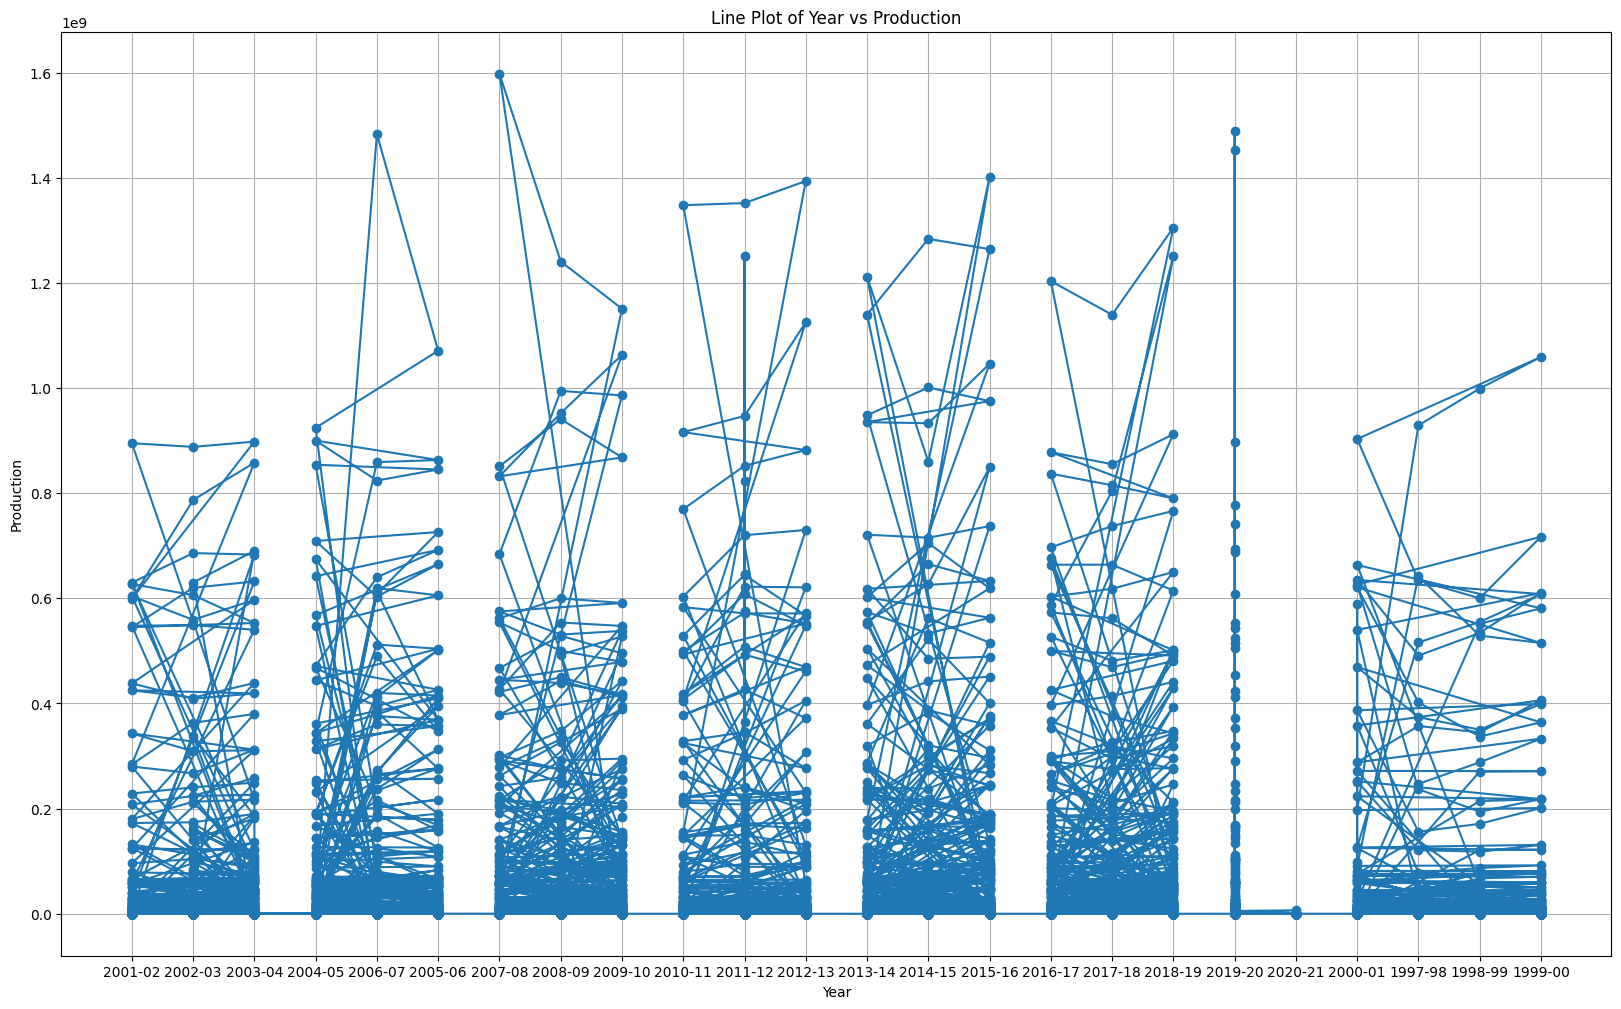

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(data['Year'], data['Production'], marker='o', linestyle='-')
plt.title('Line Plot of Year vs Production')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)
plt.show()

# **Linear Regression**

In [ ]:
# Feature selection
features = data[['Area', 'Yield']]  # Example features
target = data['Production']

###Split the data into training and test sets (80% training, 20% testing)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Standardize the features

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Create and train the linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Evaluate the model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
# r2 (r-square)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 1348075.7505504666
Mean Squared Error (MSE): 422796259289817.06
Root Mean Squared Error (RMSE): 20562010.09847571
R-squared: 0.19003878320360545


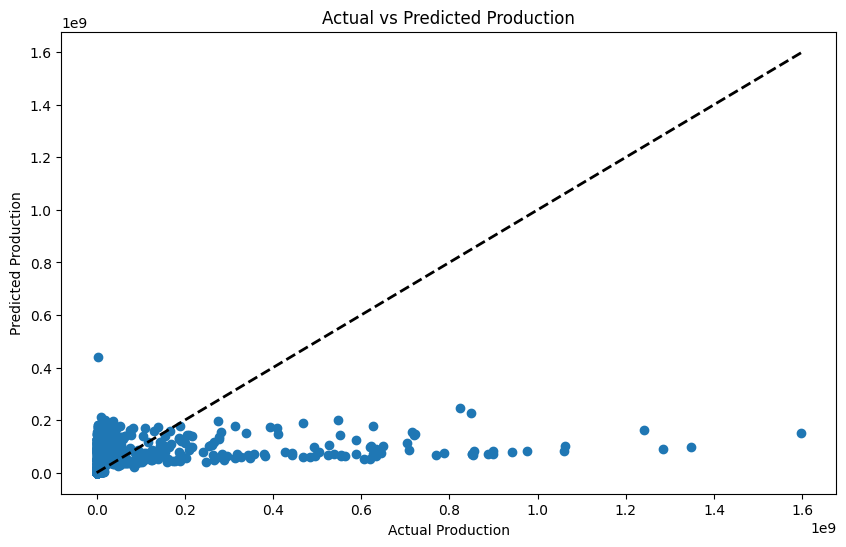

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Production')
plt.ylabel('Predicted Production')
plt.title('Actual vs Predicted Production')
plt.show()

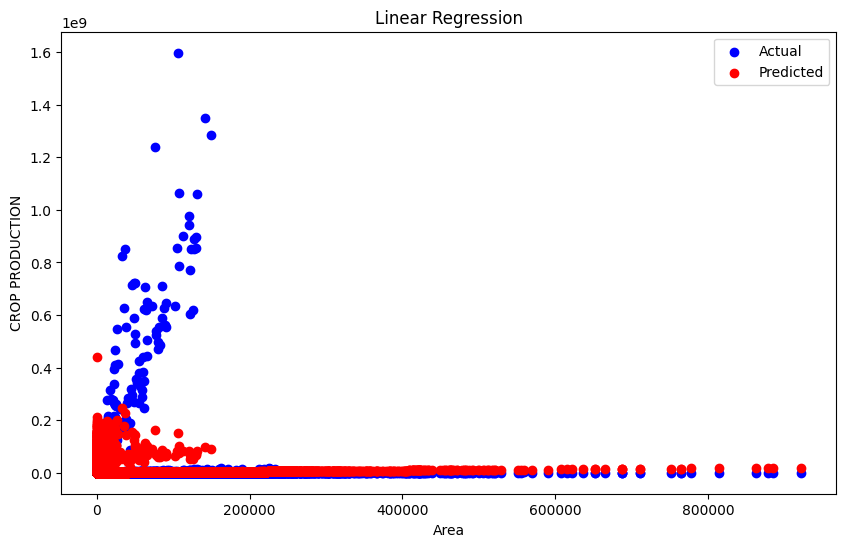

In [ ]:
if len(features.columns) >=2:
  plt.figure(figsize=(10, 6))
  plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
  plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
  plt.xlabel(features.columns[0])
  plt.ylabel('CROP PRODUCTION')
  plt.title('Linear Regression')
  plt.legend()
  plt.show()
else:
  print("Visualization requires at least two features for plotting.")

# SVM Regression (Support Vector Machine)

In [ ]:
data_sample = data.sample(frac=0.1, random_state=42) # Using 10% of the data
features_sample = data_sample[['Area', 'Yield']]
target_sample = data_sample['Production']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_sample, target_sample, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR

#Create and train the SVM regression model
svm_model = SVR(kernel='rbf')  # Using Radial Basis Function kernel (RBF)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

###Evaluate the model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# R-squared score
r2 = r2_score(y_test, y_pred)


# Print the evaluation metrics
print('Mean Absolute Error (MAE): ',mae)
print('Mean Squared Error (MSE): ',mse)
print('Root Mean Squared Error (RMSE): ',rmse)
print('R-squared:',r2)

Mean Absolute Error (MAE):  704213.0637802847
Mean Squared Error (MSE):  454752045977575.44
Root Mean Squared Error (RMSE):  21324916.08371708
R-squared: -0.001084426684254014


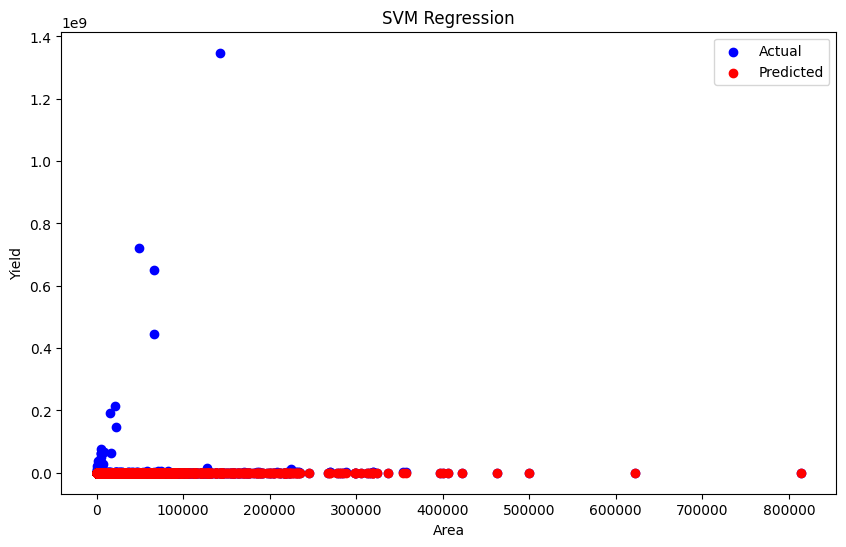

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


if len(features.columns) >=2:
  plt.figure(figsize=(10, 6))
  plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
  plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
  plt.xlabel(features.columns[0])
  plt.ylabel('Yield')
  plt.title('SVM Regression')
  plt.legend()
  plt.show()
else:
  print("Visualization requires at least two features for plotting.")


#Lasso Regularization

In [ ]:
#standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#train Lasso(L1)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)

lasso_pred = lasso_model.predict(X_test_scaled)

In [ ]:
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f'Mean Absolute Error (MAE): {lasso_mae}')
print(f'Mean Squared Error (MSE): {lasso_mse}')
print(f'Root Mean Squared Error (RMSE): {lasso_rmse}')
print(f'R-squared: {lasso_r2}')

Mean Absolute Error (MAE): 1304638.03715735
Mean Squared Error (MSE): 385423852396947.44
Root Mean Squared Error (RMSE): 19632214.65848791
R-squared: 0.15153363306415746


# Ridge Regularization

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#train Ridge(L2)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

ridge_pred = ridge_model.predict(X_test_scaled)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#train Ridge(L2)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

ridge_pred = ridge_model.predict(X_test_scaled)

[ ]
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f'Mean Absolute Error (MAE): {ridge_mae}')
print(f'Mean Squared Error (MSE): {ridge_mse}')
print(f'Root Mean Squared Error (RMSE): {ridge_rmse}')
print(f'R-squared: {ridge_r2}')

Mean Absolute Error (MAE): 1304586.568432257
Mean Squared Error (MSE): 385423094181126.1
Root Mean Squared Error (RMSE): 19632195.347976908
R-squared: 0.15153530218924982


# K-Nearest Neighbors (KNN) Regression

In [ ]:
from sklearn.model_selection import train_test_split
X=features
y=target
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

#train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

#predictions
knn_pred = knn_model.predict(X_test_scaled)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#EVALUATION
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knnr2 = r2_score(y_test, knn_pred)

print(f'Mean Absolute Error (MAE): {knn_mae}')
print(f'Mean Squared Error (MSE): {knn_mse}')
print(f'Root Mean Squared Error (RMSE): {knn_rmse}')
print(f"R-squared: {knnr2}")

Mean Absolute Error (MAE): 139181.94371798038
Mean Squared Error (MSE): 24661245794808.223
Root Mean Squared Error (RMSE): 4966009.040951116
R-squared: 0.9527558434759337


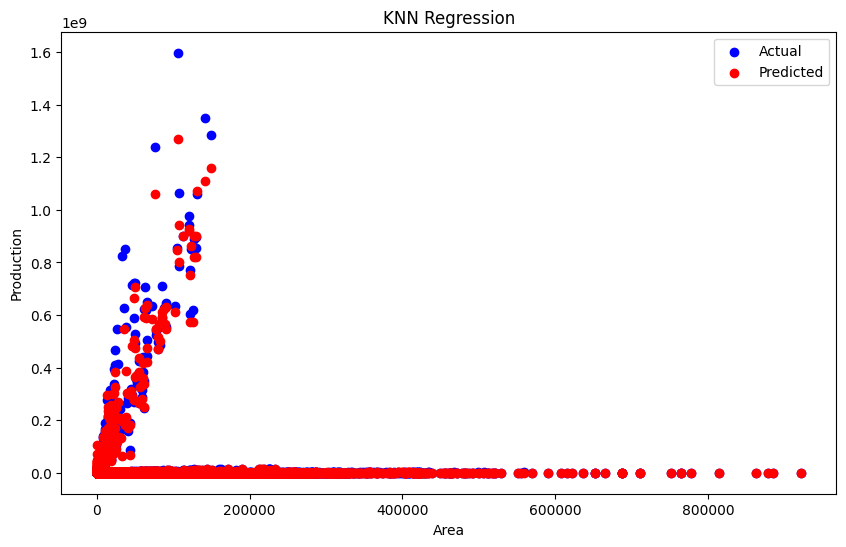

In [ ]:
if len(features.columns) >= 2:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual')
    plt.scatter(X_test.iloc[:, 0], knn_pred, color='red', label='Predicted')
    plt.xlabel(features.columns[0])
    plt.ylabel('Production')
    plt.title('KNN Regression')
    plt.legend()
    plt.show()
else:
    print("Visualization requires at least two features for plotting.")